# Big Mart Sales Prediction

After cleaning my data and performing all EDA , we will make our data ready for modelling.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# imported the cleaned data

df= pd.read_csv('cleaned_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Pre processing and training data deployment


Performed Label encoding to convert the categorical data so that they can be used for modelling

In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col]=le.fit_transform(df[col])


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


Now i will split the dataset into training and test data set. But before that storing the dependent varibale which needs to be predicted into a different variable and storing the features which are independent and used for prediction into one variable

In [7]:
#Train- Test split
X=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [8]:
# Training Phase
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.2,random_state=0)


# Modelling

I will use Linear Regression , Ridge and lasso regression, decision tree, random forest , and XG boost to mdel the data.
I will use RMSE as the evaluation metric to decide which modelling gived the better result and also use cross validation to improve tthe scores

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg_lin.score(X_train,y_train)

0.5024749037080263

In [28]:
y_preds_lin=reg_lin.predict(X_test)
rmse_lin=np.sqrt(mean_squared_error(y_preds_lin,y_test))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))
scores=cross_val_score(reg_lin,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for Linear Regression:1199.66
Mean Cross validation score is: 0.5004507421344684


Text(0.5, 1, 'Linear Regression \n RMSE: 1199.66')

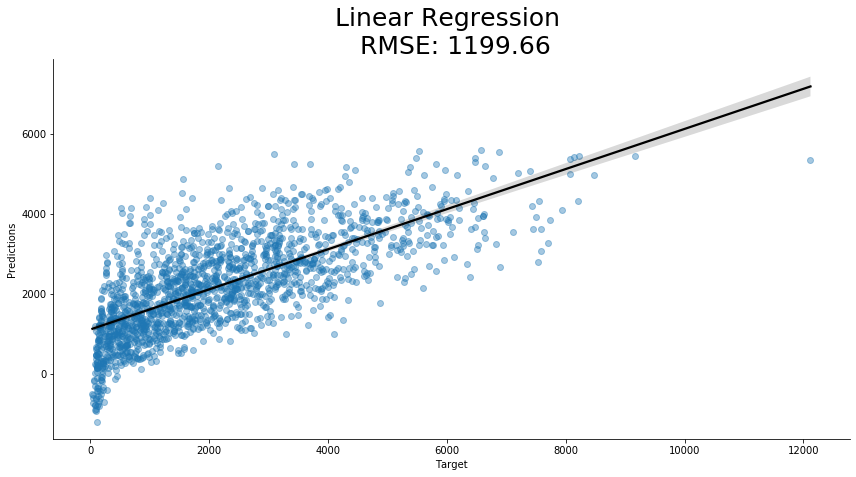

In [24]:
reg_lin_df=pd.DataFrame()
reg_lin_df['Target']=y_test
reg_lin_df['Predictions']=y_preds_lin

sns.lmplot('Target','Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

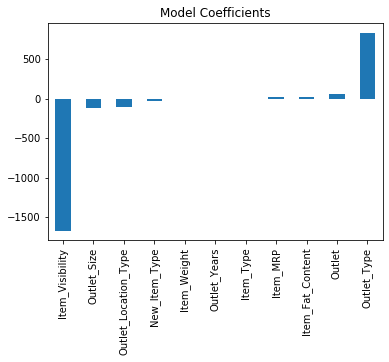

In [29]:
coef = pd.Series(reg_lin.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

As we can see, the linear regression couldn't do a great job. The values are too scattered away from the black line which is the ideal region of the scatters. The RMSE is quite high too. Hence, it will definitely be a good option to check for regression techniques utilising a regularisation parameter such as Lasso and Ridge regression.



# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
reg_rid=Ridge()
reg_rid.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
reg_rid.score(X_train,y_train)

0.5024667802665995

In [32]:
y_preds_rid=reg_rid.predict(X_test)
rmse_rid=np.sqrt(mean_squared_error(y_preds_rid,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))
scores=cross_val_score(reg_rid,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for Ridge Regression:1199.71
Mean Cross validation score is: 0.5004430288096436


Text(0.5, 1, 'Ridge Regression \n RMSE: 1199.71')

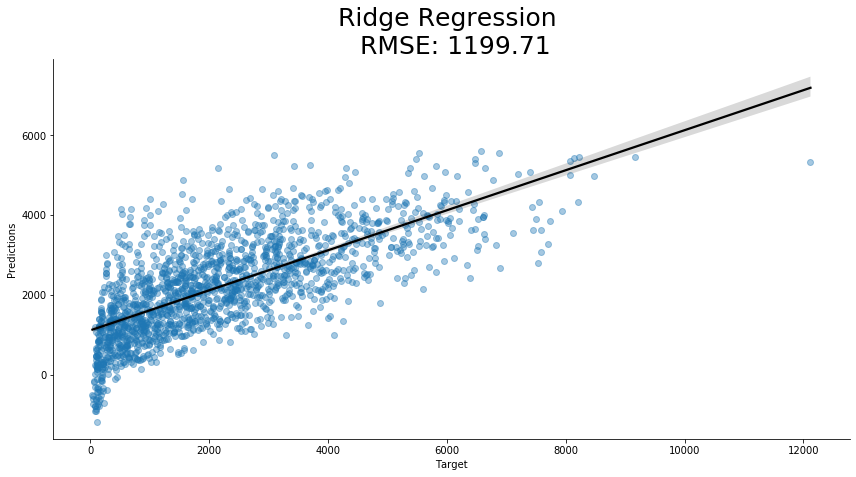

In [33]:
reg_rid_df=pd.DataFrame()
reg_rid_df['Target']=y_test
reg_rid_df['Predictions']=y_preds_rid

sns.lmplot('Target','Predictions',data=reg_rid_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_rid),size=25)

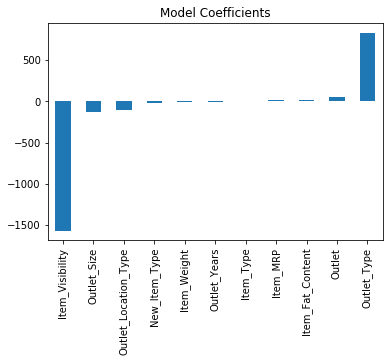

In [34]:
coef = pd.Series(reg_rid.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
reg_las=Ridge()
reg_las.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
reg_las.score(X_train,y_train)

0.5024667802665995

In [37]:
y_preds_las=reg_las.predict(X_test)
rmse_las=np.sqrt(mean_squared_error(y_preds_las,y_test))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_las))
scores=cross_val_score(reg_las,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for Lasso Regression:1199.71
Mean Cross validation score is: 0.5004430288096436


Text(0.5, 1, 'Lasso Regression \n RMSE: 1199.71')

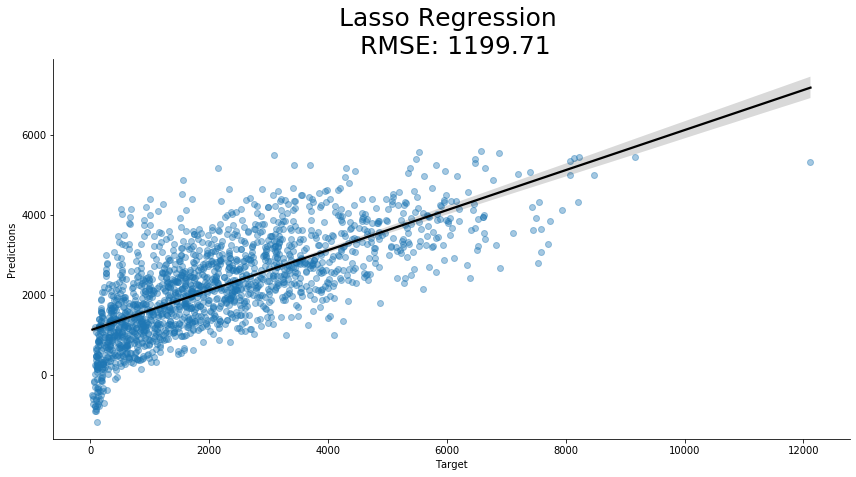

In [38]:
reg_las_df=pd.DataFrame()
reg_las_df['Target']=y_test
reg_las_df['Predictions']=y_preds_las

sns.lmplot('Target','Predictions',data=reg_las_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_las),size=25)

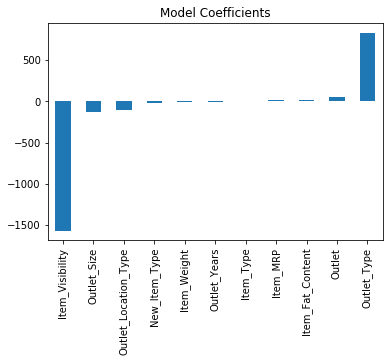

In [39]:
coef = pd.Series(reg_las.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

From the above, we have realised that all the regression techniques with and without regularisations have yielded similar results.

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
model.score(X_train,y_train)

1.0

In [66]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE for Decision Tree{0:.2f}'.format(rmse))
scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for Decision Tree1554.42
Mean Cross validation score is: 0.16184553504542393


Text(0.5, 1, 'Decision Tree \n RMSE: 1554.42')

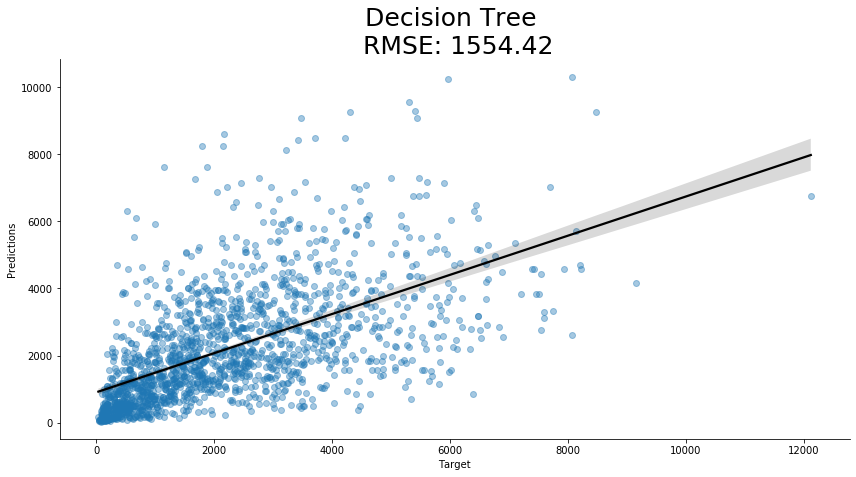

In [67]:
model_df=pd.DataFrame()
model_df['Target']=y_test
model_df['Predictions']=y_pred

sns.lmplot('Target','Predictions',data=model_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Decision Tree \n RMSE: {0:.2f}'.format(rmse),size=25)

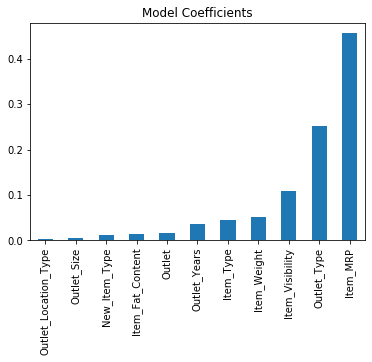

In [68]:
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# Random Forest

In [209]:
from sklearn.ensemble import RandomForestRegressor

modelr = RandomForestRegressor()
modelr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [210]:
modelr.score(X_train,y_train)

0.937752283801746

In [211]:
y_pred=modelr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE for Random Forest{0:.2f}'.format(rmse))
scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for Random Forest1139.04
Mean Cross validation score is: 0.5480223790889271


Text(0.5, 1, ' Random Forest \n RMSE: 1139.04')

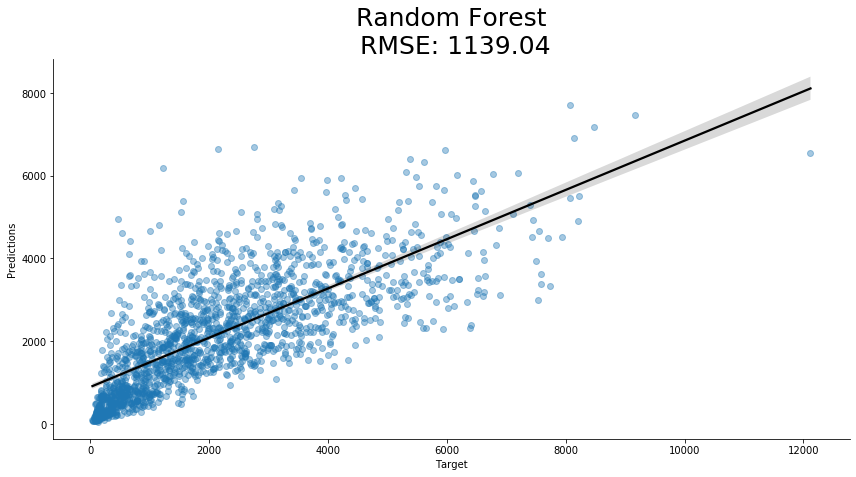

In [212]:
model_df=pd.DataFrame()
model_df['Target']=y_test
model_df['Predictions']=y_pred

sns.lmplot('Target','Predictions',data=model_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title(' Random Forest \n RMSE: {0:.2f}'.format(rmse),size=25)

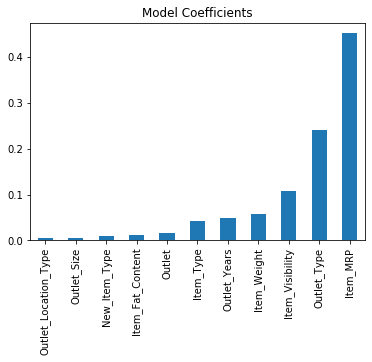

In [213]:
coef = pd.Series(modelr.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [75]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [76]:
model.score(X_train,y_train)

0.9999999549361231

In [77]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE for ExtraTree{0:.2f}'.format(rmse))
scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for ExtraTree1160.39
Mean Cross validation score is: 0.5189858238613315


Text(0.5, 1, 'Extra Tree\n RMSE: 1160.39')

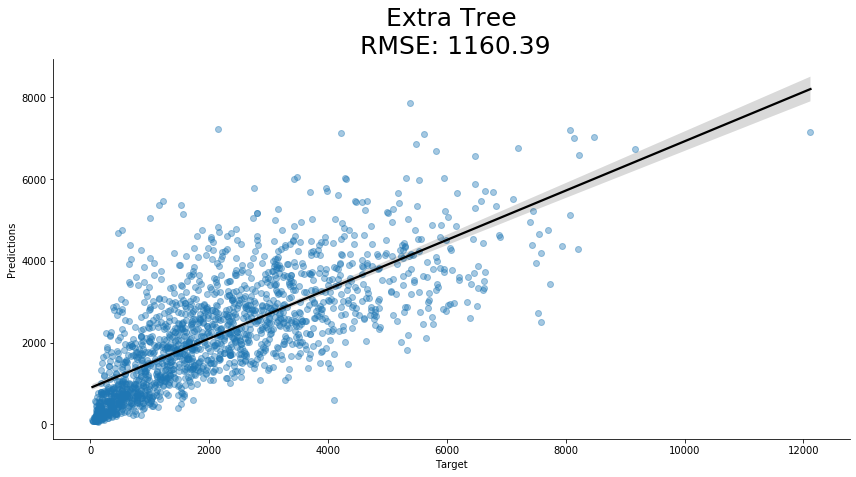

In [79]:
model_df=pd.DataFrame()
model_df['Target']=y_test
model_df['Predictions']=y_pred

sns.lmplot('Target','Predictions',data=model_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Extra Tree\n RMSE: {0:.2f}'.format(rmse),size=25)

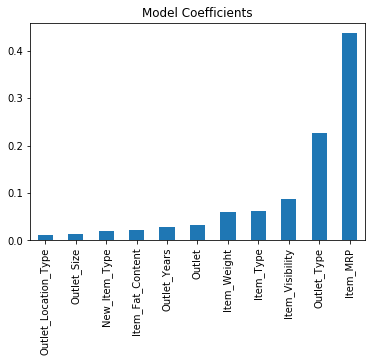

In [80]:
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [83]:
import xgboost as xgb

In [84]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
model.score(X_train,y_train)

0.8554800076081353

In [87]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE for XGBoost{0:.2f}'.format(rmse))
scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=5)
print('Mean Cross validation score is:',scores.mean())

RMSE for XGBoost1179.62
Mean Cross validation score is: 0.5277455120663482


Text(0.5, 1, 'XGboost\n RMSE: 1179.62')

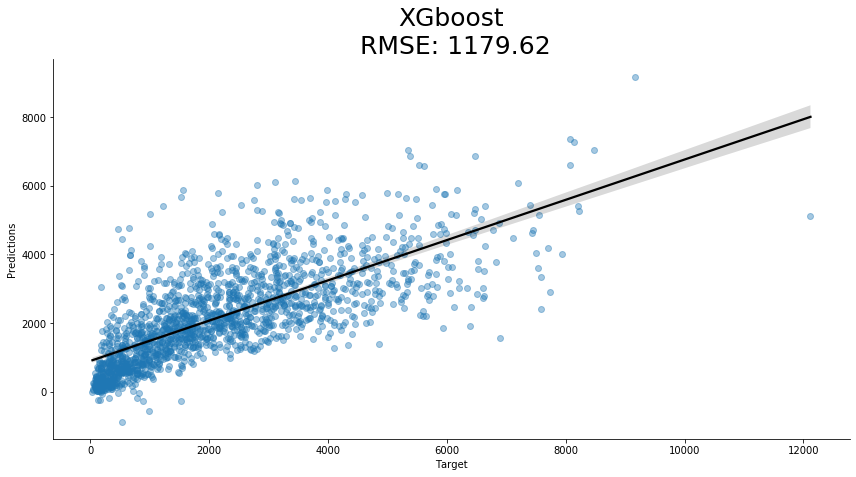

In [88]:
model_df=pd.DataFrame()
model_df['Target']=y_test
model_df['Predictions']=y_pred

sns.lmplot('Target','Predictions',data=model_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('XGboost\n RMSE: {0:.2f}'.format(rmse),size=25)

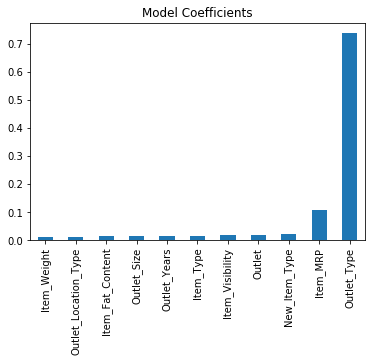

In [89]:
coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Random Forest, Extra Tree, XGboost performs the best with low RMSE, and better CV 
So we choose these model over others
and also the factors afffecting more Item_ Mrp and Outlet Type


And now we use our test data clean them so that in the same manner as testing dataset and predict the sales



# Testing Phase

In [182]:
test=pd.read_csv('test.csv')

In [183]:
df_identifiers=pd.DataFrame(test['Item_Identifier'])
df_identifiers['Outlet_Identifier']=test['Outlet_Identifier']
# check for null values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [184]:
item_weight_mean=test.pivot_table(values="Item_Weight", index= "Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [185]:
miss_bool=test["Item_Weight"].isnull()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [186]:
for i, item in enumerate(test['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            test["Item_Weight"][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            test["Item_Weight"][i]=np.mean(df['Item_Weight'])

In [187]:
test["Item_Weight"].isnull().sum()

0

In [193]:
outlet_size_mode=test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x : x.mode()[0]))

In [194]:
miss_bool=test["Outlet_Size"].isnull()
test.loc[miss_bool,'Outlet_Size']=test.loc[miss_bool,'Outlet_Type'].apply ( lambda x : outlet_size_mode[x])

In [195]:
test["Outlet_Size"].isnull().sum()

0

In [196]:
sum(test["Item_Visibility"]==0)

0

In [197]:
# replace 0s with mean
test.loc[:,"Item_Visibility"].replace([0],[df["Item_Visibility"].mean()],inplace=True)

In [198]:
cat_col=[]
for x in test.dtypes.index:
    if test.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [199]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat': 'Low Fat'})
test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [200]:
test['New_Item_Type']=test["Item_Identifier"].apply(lambda x : x[:2])
test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [201]:
test['New_Item_Type']=test['New_Item_Type'].replace({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [202]:
test.loc[test['New_Item_Type']=="Non-Consumable",'Item_Fat_Content']='Non-Edible'

In [203]:
test["Outlet_Years"]=2013-test["Outlet_Establishment_Year"]

In [204]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
test['Outlet']=le.fit_transform(test['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    test[col]=le.fit_transform(test[col])

In [205]:
unn_cols=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']

for cols in unn_cols:
    test.drop(cols,axis=1,inplace=True)

In [206]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,20.750000,0,0.007565,13,107.8622,1,0,1,1,14,9
1,8.300000,2,0.038428,4,87.3198,2,1,1,1,6,2
2,14.600000,1,0.099575,11,241.7538,2,2,0,2,15,0
3,7.315000,0,0.015388,13,155.0340,2,1,1,1,6,2
4,12.857645,2,0.118599,4,234.2300,1,2,3,1,28,5


In [153]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
6404,12.857645,0,0.008722,6,123.5414,1,2,3,1,28,5
5820,18.700000,0,0.014623,14,52.0324,2,1,1,0,11,7
48,15.850000,2,0.121633,0,60.6220,2,0,1,1,16,8
4583,12.857645,0,0.145670,5,247.2776,2,0,0,1,28,4
3791,21.000000,0,0.049296,13,194.4478,2,1,1,1,9,6


In [214]:
y_pred=modelr.predict(test)
df_rfr_submission=df_identifiers
df_rfr_submission['Item_Outlet_Sales']=y_pred
df_rfr_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1711.532112
1,FDW14,OUT017,1261.637736
2,NCN55,OUT010,763.512808
3,FDQ58,OUT017,2236.448832
4,FDY38,OUT027,6138.502892


In [215]:
df_rfr_submission.to_csv('RFR_submission.csv',index=False)

the outlet sales are predicted and stored. This model can be used to predict the sales of the outlet and determine which feature is affecting the sales the most
This can be used by the client to predict the sales of the outlet and decide that what can they improve oon so that their sales might increase. This will increase their profit and help them to grow